In [2]:
from dataset.hico import build
import argparse
from PIL import Image, ImageDraw, ImageFont
from IPython.display import clear_output

In [3]:
parser = argparse.ArgumentParser(description="hico")
parser.add_argument('--num_queries', default=100, type=int, help="Number of query slots")
parser.add_argument("--data_path", default="/data/dataset/HICO-DET/", type=str)
args = parser.parse_args([])

In [23]:
dataset_train = build("train", args)
dataset_val = build("val", args)
actions = dataset_train.get_actions()
COCO_CLASSES = dataset_train.COCO_CLASSES
len(dataset_train), len(dataset_val)

(37633, 9546)

dict_keys(['orig_size', 'size', 'boxes', 'labels', 'iscrowd', 'area', 'pair_targets', 'pair_actions', 'sub_boxes', 'obj_boxes', 'relation_map', 'hois', 'image_id'])


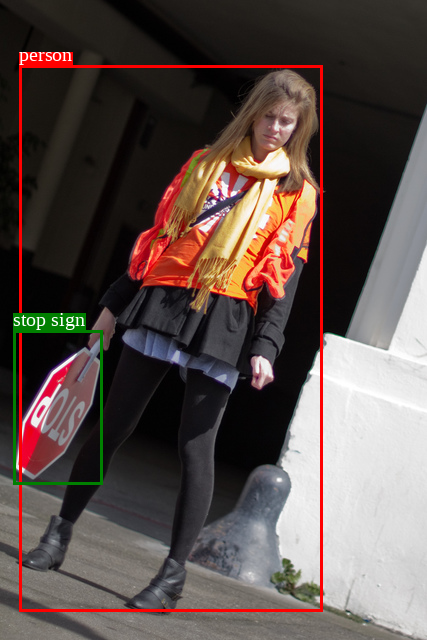

hold


In [34]:
font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", size=20)
for i, (img, anno) in enumerate(dataset_train):
  draw = ImageDraw.Draw(img)
  # print(anno.keys())
  hois = anno["hois"]
  boxes = anno["boxes"]
  labels = anno["labels"]
  hoi_names = []
  for (hum_id, obj_id, hoi_id) in hois:
    hum_bb = boxes[hum_id]
    hum_label = labels[hum_id]
    hum_name = COCO_CLASSES[hum_label]
    
    obj_bb = boxes[obj_id]
    obj_label = labels[obj_id]
    obj_name = COCO_CLASSES[obj_label]
    
    hoi_name = actions[hoi_id]
    hoi_names.append(hoi_name)
    
    draw.rectangle((hum_bb[0], hum_bb[1], hum_bb[2], hum_bb[3]), outline="red", width=3)
    text_area = draw.textbbox((hum_bb[0], hum_bb[1]), hum_name, font=font, anchor="lb")
    draw.rectangle(text_area, fill="red")
    draw.text((hum_bb[0], hum_bb[1]), hum_name, fill='white', font=font, anchor="lb")
    
    draw.rectangle((obj_bb[0], obj_bb[1], obj_bb[2], obj_bb[3]), outline="green", width=3)
    text_area = draw.textbbox((obj_bb[0], obj_bb[1]), obj_name, font=font, anchor="lb")
    draw.rectangle(text_area, fill="green")
    draw.text((obj_bb[0], obj_bb[1]), obj_name, fill='white', font=font, anchor="lb")
    
  display(img)
  print(", ".join(hoi_names))
  
  message = input(str(i))
  if message == 'end':
    break
  clear_output(True)

In [41]:
dataset_train.get_actions()[98]

'straddle'